In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
sns.set(style='white',  font='sans-serif', font_scale=1.5)

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """
    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

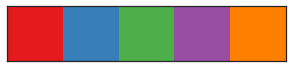

In [2]:
s = sns.color_palette("Set1", n_colors=5)
sns.palplot(s)
c = [s[1], s[2], s[3]]

In [3]:
c = [s[1], s[2], s[3]]

In [4]:
palette = c
linewidth = 2.5
hue_order = ['AttentiveFP','DMPNN', 'MMNB-OOTB']
hue_order2 = ['AttentiveFP', 'DMPNN', 'MMNF-OOTB']

In [5]:
df1 = pd.read_csv('./results_attentivefp.csv', index_col=0)
df2 = pd.read_csv('./results_chemprop.csv', index_col=0)
df3 = pd.read_csv('./results_molmap.csv', index_col=0)

In [6]:
df = df1.append(df2).append(df3)
dfall = df.copy()
reg = df[df['test_metric'] == 'RMSE']
cla = df[df['test_metric'] == 'ROC_AUC']

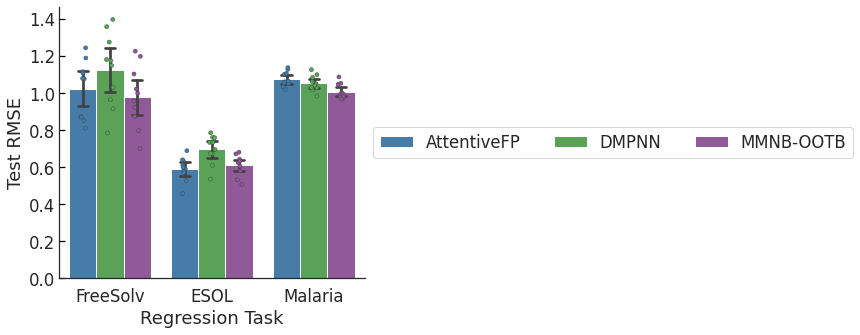

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (22, 5))
sns.barplot(x="task_name", y="test_performance",hue = 'model', data=reg, palette=palette,
                hue_order = hue_order,  ax= ax, capsize=0.1)


g = sns.stripplot(x="task_name", y="test_performance", hue = 'model', data=reg, color= ".2",  ax= ax, size = 4,
                   split=True,  jitter=True, linewidth=0.5, edgecolor='gray',  palette = palette) #palette="Set2",palette = [".8", ".8"]


handles, labels = g.get_legend_handles_labels()


ax.legend(handles[3:], labels[3:], loc='center left', ncol =3, bbox_to_anchor=(1, 0.5))

#ax.legend_.remove()
ax.set_ylabel('Test RMSE')
ax.set_xlabel('Regression Task')

ax.tick_params(axis='y',which='major',direction='in', left=True, length=6, color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_box_aspect(8/len(ax.patches))

 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

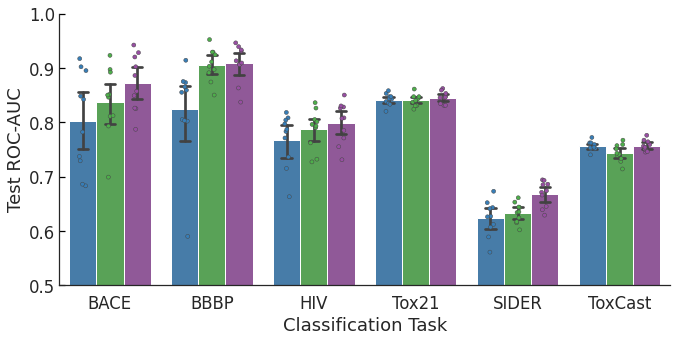

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (22, 5))
sns.barplot(x="task_name", y="test_performance",hue = 'model', data=cla, palette=palette,
                hue_order = hue_order,  ax= ax, capsize=0.1)


g = sns.stripplot(x="task_name", y="test_performance", hue = 'model', data=cla, color= ".2",  ax= ax, size = 4,
                   split=True,  jitter=True, linewidth=0.5, edgecolor='gray',  palette = palette) #palette="Set2",palette = [".8", ".8"]


handles, labels = g.get_legend_handles_labels()


#ax.legend(handles[0:3], labels[0:3], loc='center left', bbox_to_anchor=(1, 0.5))

ax.legend_.remove()
ax.set_ylabel('Test ROC-AUC')
ax.set_xlabel('Classification Task')

ax.tick_params(axis='y',which='major',direction='in', left=True, length=6, color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(0.5, 1)
ax.set_box_aspect(8/len(ax.patches))

In [45]:
ax.get_ylim()

(0.0, 0.9996)

In [12]:
reg

,task_name,seed,split,test_metric,test_performance,model
0,FreeSolv,2,random,RMSE,1.114,AttentiveFP
1,FreeSolv,16,random,RMSE,1.243,AttentiveFP
2,FreeSolv,32,random,RMSE,1.188,AttentiveFP
3,FreeSolv,64,random,RMSE,1.107,AttentiveFP
4,FreeSolv,128,random,RMSE,1.076,AttentiveFP
...,...,...,...,...,...,...
25,Malaria,256,random,RMSE,1.052,MMNB-OOTB
26,Malaria,512,random,RMSE,1.086,MMNB-OOTB
27,Malaria,1024,random,RMSE,0.967,MMNB-OOTB
28,Malaria,2048,random,RMSE,0.991,MMNB-OOTB


# 1) Regression

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home

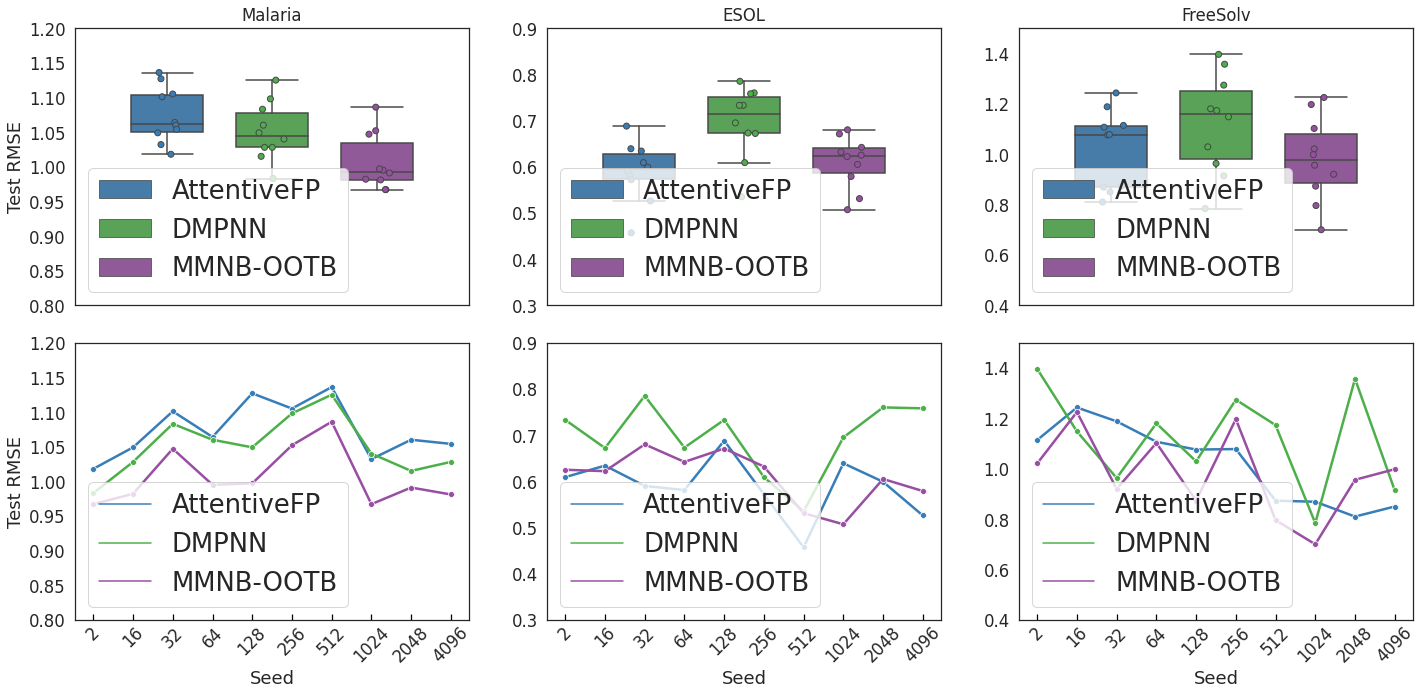

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 10))

axes1, axes2 = axes

(ax1, ax2, ax3) = axes1

for order, ax in zip([["Malaria"],["ESOL"],['FreeSolv'],], axes1):
    sns.boxplot(x="task_name", y="test_performance",hue = 'model', data=reg, palette=palette,
                hue_order = hue_order, order = order, fliersize=0, ax= ax)

    
    
    g = sns.stripplot(x="task_name", y="test_performance", hue = 'model', data=reg, color= ".2", order = order, ax= ax, size = 6,
                       split=True,  jitter=True, linewidth=1, edgecolor='gray',  palette = palette) #palette="Set2",palette = [".8", ".8"]
    
    #g.legend_.remove()
    #g.legend(ncol=2, fontsize='x-large', loc = "lower left")

    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[0:3], labels[0:3], fontsize='x-large', loc = "lower left")
    
for ax in axes1:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',which='major',direction='in', bottom=True, length=6, color='white')    
    
ax1.set_ylabel('Test RMSE')
ax1.set_ylim(0.8, 1.2)
ax2.set_ylim(0.3, 0.9)
ax3.set_ylim(0.4, 1.5)


tasks = ['Malaria', 'ESOL', "FreeSolv"]
ax1, ax2, ax3 = axes2

for task, ax in zip(tasks, axes2):

    df = reg[reg.task_name == task]
    df.seed = df.seed.astype(str)
 
    g = sns.lineplot(x="seed", y="test_performance", hue = 'model', hue_order = hue_order, style = True, marker='o', #marker='o', s
                     sort = False, data=df,  linewidth=linewidth,  
                     palette=palette, ax = ax)

    g.set_xticklabels(df.seed.unique(), rotation=45 )
    g.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='black')
    g.set_xlabel(task)
    #g.legend_.remove()
    #g.legend(title = '', ncol=1, fontsize='x-large', loc = "lower left", labels = hue_order)

    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[1:-1], labels[1:-1], fontsize='x-large', loc = "lower left")


for ax in axes2:
    ax.set_ylabel('')
    ax.set_xlabel('Seed')    
    
ax1.set_ylabel('Test RMSE')
ax1.set_ylim(0.8, 1.2)
ax2.set_ylim(0.3, 0.9)
ax3.set_ylim(0.4, 1.5)


adjust_box_widths(fig, 0.7)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

fig.savefig("./images/svg/box.malaria.esol.freesolv.svg", dpi=300, format='svg')

# 2) Scaffold classification

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/sxh/anaconda3/envs/rdkit

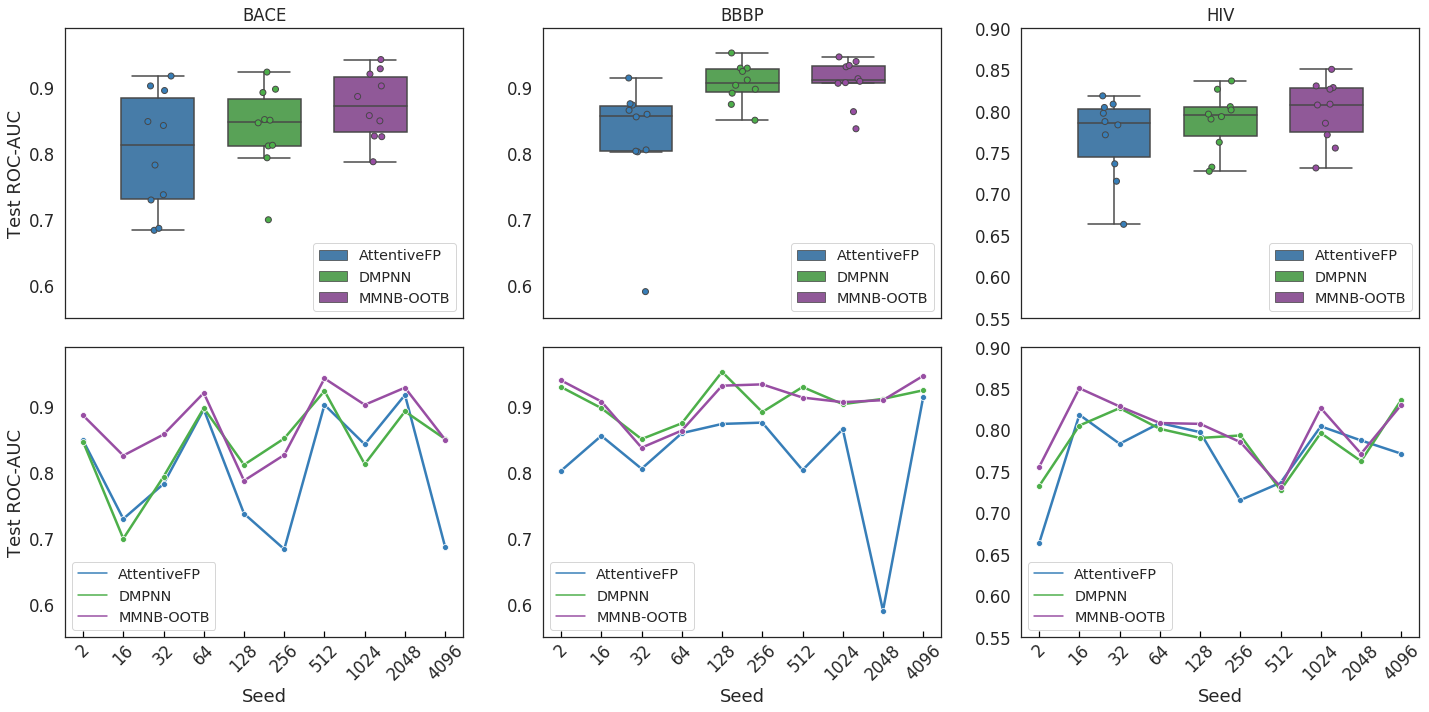

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 10))

axes1, axes2 = axes

(ax1, ax2, ax3) = axes1

for order, ax in zip([["BACE"],["BBBP"],['HIV'],], axes1):
    sns.boxplot(x="task_name", y="test_performance",hue = 'model', hue_order = hue_order, data=cla, palette=palette, order = order, fliersize=0, ax= ax)
    
    g = sns.stripplot(x="task_name", y="test_performance", hue = 'model', hue_order = hue_order,data=cla, color= ".2", order = order, ax= ax, size = 6,
                       split=True,  jitter=True, linewidth=1, edgecolor='gray',  palette = palette) #palette="Set2",palette = [".8", ".8"]
    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[0:3], labels[0:3], fontsize='x-large', loc = "lower right")
    
for ax in axes1:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='white')
    
ax1.set_ylabel('Test ROC-AUC')
ax1.set_ylim(0.55, 0.99)
ax2.set_ylim(0.55, 0.99)
ax3.set_ylim(0.55, 0.90)




tasks = ['BACE', 'BBBP', "HIV"]
ax1, ax2, ax3 = axes2
for task, ax in zip(tasks, axes2):

    df = cla[cla.task_name == task]
    df.seed = df.seed.astype(str)
 
    g = sns.lineplot(x="seed", y="test_performance", hue = 'model', hue_order = hue_order, style = True, 
                     marker='o',  #marker='o', s
                     sort = False, data=df,  linewidth=linewidth,  
                     palette = palette, ax = ax)

    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[1:-1], labels[1:-1], fontsize='x-large', loc = "lower left")

    g.set_xticklabels(df.seed.unique(), rotation=45 )
    g.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='black')
    g.set_xlabel(task)


for ax in axes2:
    ax.set_ylabel('')
    ax.set_xlabel('Seed')
    
ax1.set_ylabel('Test ROC-AUC')

ax1.set_ylim(0.55, 0.99)
ax2.set_ylim(0.55, 0.99)
ax3.set_ylim(0.55, 0.90)


adjust_box_widths(fig, 0.7)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

fig.savefig('./images/svg/box.bace.bbbp.hiv.svg', dpi=300, format='svg')


# 3) Random classification-multitasks

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/sxh/anaconda3/envs/rdkit

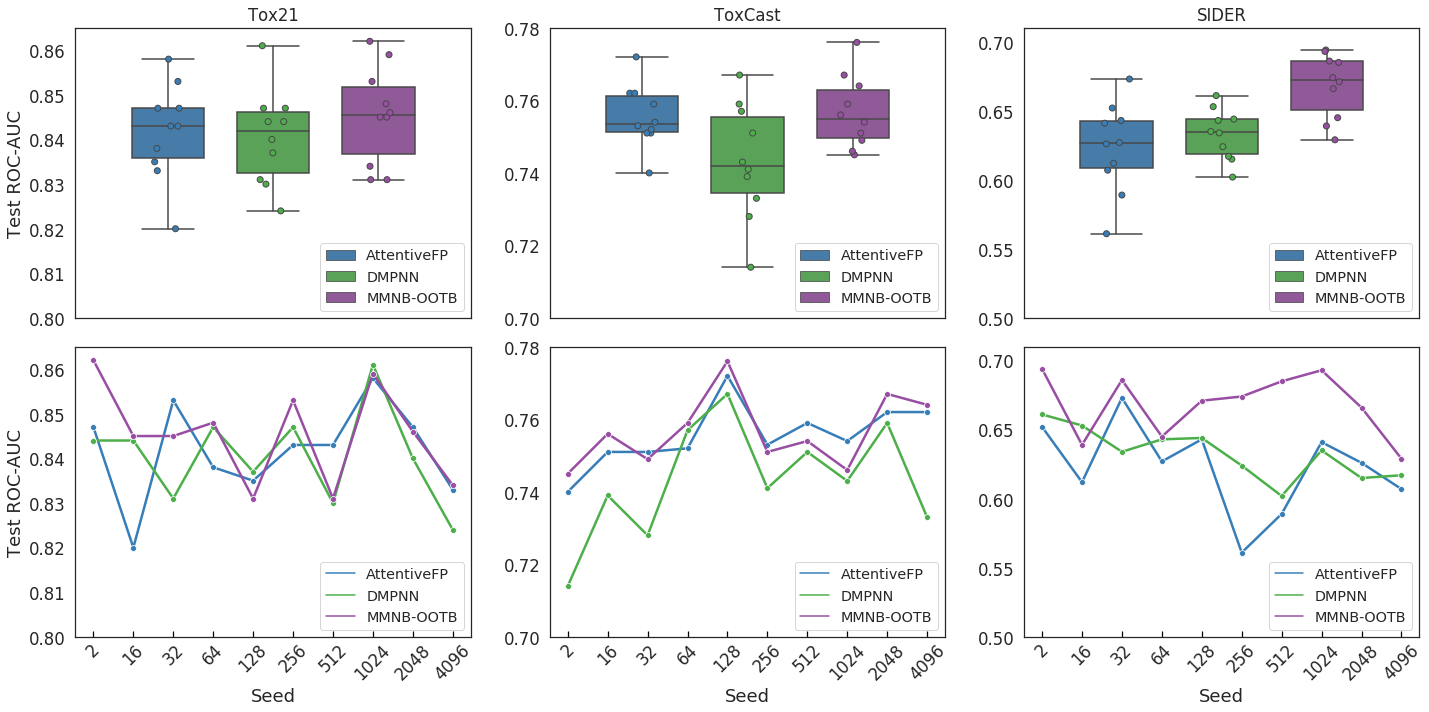

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 10))
axes1, axes2 = axes
tasks = ['Tox21', 'ToxCast', "SIDER"]



(ax1, ax2, ax3) = axes1
for order, ax in zip([["Tox21"],["ToxCast"],['SIDER'],], axes1):
    sns.boxplot(x="task_name", y="test_performance",hue = 'model', hue_order = hue_order, data=cla, palette=palette, order = order, fliersize=0, ax= ax)
    
    g = sns.stripplot(x="task_name", y="test_performance", hue = 'model',hue_order = hue_order, data=cla, color= ".2", order = order, ax= ax, size = 6,
                       split=True,  jitter=True, linewidth=1, edgecolor='gray',  palette =palette) #palette="Set2",palette = [".8", ".8"]
    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[0:3], labels[0:3], fontsize='x-large', loc = "lower right")
            
for ax in axes1:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='white')
    
ax1.set_ylabel('Test ROC-AUC')

ax1.set_ylim(0.8, 0.865)
ax2.set_ylim(0.70, 0.78)
ax3.set_ylim(0.5, 0.71)


ax1, ax2, ax3 = axes2
for task, ax in zip(tasks, axes2):

    df = cla[cla.task_name == task]
    df.seed = df.seed.astype(str)
 
    g = sns.lineplot(x="seed", y="test_performance", hue = 'model', hue_order = hue_order, style = True, 
                     marker='o',  #dashes=[(2,2)], marker='o', s 
                     sort = False, data=df,  linewidth=linewidth,  
                     palette=palette, ax = ax)

    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[1:-1], labels[1:-1], fontsize='x-large', loc = "lower right")

    g.set_xticklabels(df.seed.unique(), rotation=45 )
    g.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='black')
    g.set_xlabel(task)


for ax in axes2:
    ax.set_ylabel('')
    ax.set_xlabel('Seed')

    
ax1.set_ylabel('Test ROC-AUC')

ax1.set_ylim(0.8, 0.865)
ax2.set_ylim(0.70, 0.78)
ax3.set_ylim(0.5, 0.71)


adjust_box_widths(fig, 0.7)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

fig.savefig('./images/svg/box.tox21.toxcast.sider.svg', dpi=300, format='svg')

# 4) Random classification-large scale tasks

In [11]:
df1 = pd.read_csv('./chemprop_muv_pcba_chembl.csv', index_col=0)
df2 = pd.read_csv('./molmap_muv_pcba_chembl.csv', index_col=0)

df11 = df1.copy()
df12 = df1.copy()

df11['test_metric'] = 'ROC_AUC'
df11['test_performance'] = df11.test_roc
df11['model'] = "DMPNN"
df11['split'] = 'random'
df11 = df11[["task_name","seed", "split", "test_metric","test_performance","model"]]


df12['test_metric'] = 'PRC_AUC'
df12['test_performance'] = df12.test_prc
df12['model'] = "DMPNN"
df12['split'] = 'random'
df12 = df12[["task_name","seed", "split", "test_metric","test_performance","model"]]


df21 = df2.copy()
df22 = df2.copy()

df21['test_metric'] = 'ROC_AUC'
df21['test_performance'] = df21.test_roc
df21['model'] = "MMNB-OOTB"
df21['split'] = 'random'
df21 = df21[["task_name","seed", "split", "test_metric","test_performance","model"]]
df21.iloc[10:]['model'] = 'MMNF-OOTB'

df22['test_metric'] = 'PRC_AUC'
df22['test_performance'] = df22.test_prc
df22['model'] = "MMNB-OOTB"
df22['split'] = 'random'
df22 = df22[["task_name","seed", "split", "test_metric","test_performance","model"]]
df22.iloc[10:]['model'] = 'MMNF-OOTB'

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
df_large_scale = df11.append(df12).append(df21).append(df22)
df_large_scale.round(3).to_csv('./results_muv_pcba_chembl.csv')
dfl = df_large_scale[df_large_scale.test_metric == 'ROC_AUC']

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/sxh/anaconda3/envs/rdkit

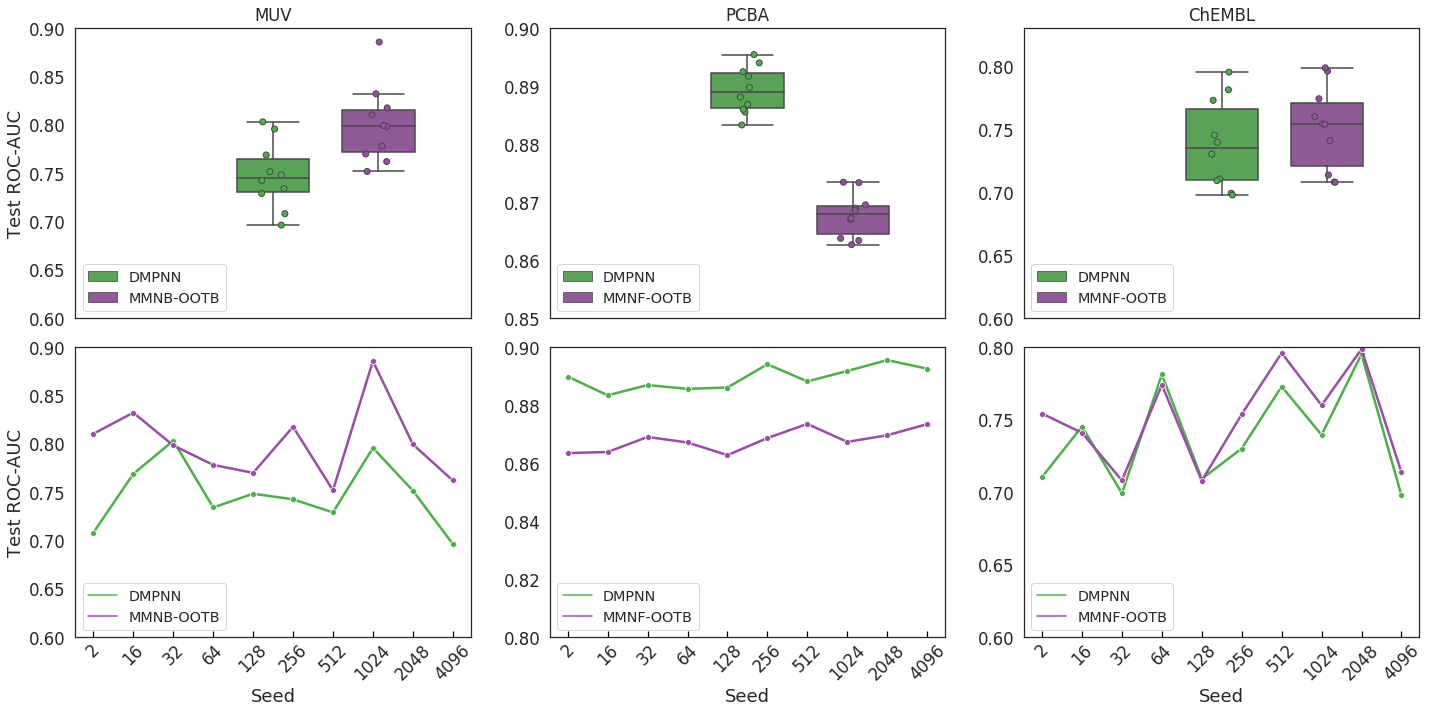

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 10))
(axes1, axes2) = axes

(ax1, ax2, ax3) = axes1

tasks = ['MUV', 'PCBA', "ChEMBL"]

for order, ax in zip([["MUV"],["PCBA"],['ChEMBL'],], axes1):
    
    if order == ["MUV"]:
        hue_order_ = hue_order
    else:
        hue_order_ = hue_order2
        
    sns.boxplot(x="task_name", y="test_performance",hue = 'model', data=dfl, palette= palette, 
                order = order, fliersize=0, ax= ax, hue_order = hue_order_)

    g = sns.stripplot(x="task_name", y="test_performance", hue = 'model', data=dfl, 
                      color= ".2", order = order, 
                      ax= ax, size = 6,hue_order=hue_order_,
                       split=True,  jitter=True, linewidth=1, edgecolor='gray',  palette = palette) #palette="Set2",palette = [".8", ".8"]


    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[1:3], labels[1:3], fontsize='x-large', loc = "lower left")
    
for ax in axes1:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='white')
    

ax1.set_ylabel('Test ROC-AUC')

ax1.set_ylim(0.6, 0.9)
ax2.set_ylim(0.85, 0.90)
ax3.set_ylim(0.6, 0.83)


ax1, ax2, ax3 = axes2

for task, ax in zip(tasks, axes2):

    df = dfl[dfl.task_name == task]
    df.seed = df.seed.astype(str)
    
    if task == "MUV":
        hue_order_ = hue_order
    else:
        hue_order_ = hue_order2
        
    g = sns.lineplot(x="seed", y="test_performance", hue = 'model', style = True, hue_order=hue_order_,
                     marker='o',  #dashes=[(2,2)], marker='o', s
                     sort = False, data=df,  linewidth=linewidth,  palette = palette,ax = ax)

    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[2:-1], labels[2:-1], fontsize='x-large', loc = "lower left")
    g.set_xticklabels(df.seed.unique(), rotation=45 )
    g.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='black')
    g.set_xlabel(task)


for ax in axes2:
    ax.set_ylabel('')
    ax.set_xlabel('Seed')
    
ax1.set_ylabel('Test ROC-AUC')

ax1.set_ylim(0.6, 0.9)
ax2.set_ylim(0.8, 0.9)
ax3.set_ylim(0.6, 0.8)

adjust_box_widths(fig, 0.7)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

fig.savefig('./images/svg/box.muv.pcba.chembl.svg', dpi=300, format='svg')

In [14]:
dfp = df_large_scale[df_large_scale.test_metric == 'PRC_AUC']

In [15]:
dfall = dfall.append(dfl).append(dfp).reset_index(drop=True)

In [16]:
x1 = dfall.groupby([ 'test_metric', 'task_name', 'model'])['test_performance'].apply(np.mean).round(3).to_frame(name = 'mean')

In [17]:
x2 = dfall.groupby(['test_metric', 'task_name', 'model'])['test_performance'].apply(np.std).round(3).to_frame(name = 'std')

In [18]:
x1.join(x2).to_excel('./all.mean.xlsx')
dfall.to_excel('./all.raw.xlsx')